In [10]:
import pandas as pd
import numpy as np
import talib as ta
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression


# Import

In [11]:
D = pd.read_parquet('btcusd_hourly_price_indicators.parquet', engine='pyarrow')
D

,open,high,low,close,volume,return_forward,return,obv,sma_5,sma_20,...,rsi_7,rsi_14,atr_7,atr_14,upper_band_10,middle_band_10,lower_band_10,upper_band_20,middle_band_20,lower_band_20
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,28912.47,29052.03,28776.17,28949.03,365.064315,0.008612,0.000970,147510.239086,28736.930,28854.8905,...,57.159365,55.986099,422.886222,417.797020,29223.387286,28741.153,28258.918714,29307.198761,28854.8905,28402.582239
2021-01-01 01:00:00,28949.71,29200.00,28921.64,29198.34,520.772208,-0.007061,0.008612,148031.011293,28813.352,28858.0050,...,64.203215,59.942816,402.239619,407.837232,29240.874492,28744.982,28249.089508,29318.792740,28858.0050,28397.217260
2021-01-01 02:00:00,29200.00,29219.01,28947.70,28992.18,394.441884,0.005256,-0.007061,147636.569409,28932.070,28869.1935,...,55.413387,55.499724,383.535388,398.085287,29256.754515,28750.826,28244.897485,29331.599971,28869.1935,28406.787029
2021-01-01 03:00:00,28987.60,29191.60,28945.26,29144.56,220.722444,-0.005207,0.005256,147857.291854,29041.018,28889.6280,...,60.121363,57.978989,363.936047,387.246338,29351.781840,28798.405,28245.028160,29362.660536,28889.6280,28416.595464
2021-01-01 04:00:00,29135.25,29161.46,28843.74,28992.79,500.353472,0.002213,-0.005207,147356.938382,29055.380,28887.0185,...,53.550828,54.709601,357.333754,382.280171,29380.790455,28842.084,28303.377545,29357.161215,28887.0185,28416.875785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,93760.00,94158.00,93600.00,94008.00,7.863550,-0.006308,0.002666,175364.391806,94342.200,94002.9000,...,44.656824,49.600999,787.401340,594.021005,95801.067876,94516.700,93232.332124,95433.425204,94002.9000,92572.374796
2024-12-31 20:00:00,94025.00,94059.00,93300.00,93415.00,4.565475,0.002858,-0.006308,175359.826331,93968.200,93998.4000,...,34.760191,42.325843,783.344006,605.805219,95876.395307,94461.600,93046.804693,95435.711991,93998.4000,92561.088009
2024-12-31 21:00:00,93386.00,93777.00,93336.00,93682.00,28.484950,-0.004142,0.002858,175388.311280,93768.800,94007.2500,...,41.563036,46.155291,734.437720,594.033418,95898.271810,94421.000,92943.728190,95434.444994,94007.2500,92580.055006


In [12]:

# train = D.loc['2021-01-01':'2022-12-31']
# val = D.loc['2023-01-01':'2023-12-31']
# test = D.loc['2024-01-01':]

In [13]:
D = D.loc['2019-01-01':'2024-12-31']
D.tail()

,open,high,low,close,volume,return_forward,return,obv,sma_5,sma_20,...,rsi_7,rsi_14,atr_7,atr_14,upper_band_10,middle_band_10,lower_band_10,upper_band_20,middle_band_20,lower_band_20
Timestamp,,,,,,,,,,,,,,,,,,,,,
2024-12-31 19:00:00,93760.0,94158.0,93600.0,94008.0,7.863550,-0.006308,0.002666,175364.391806,94342.2,94002.90,...,44.656824,49.600999,787.401340,594.021005,95801.067876,94516.7,93232.332124,95433.425204,94002.90,92572.374796
2024-12-31 20:00:00,94025.0,94059.0,93300.0,93415.0,4.565475,0.002858,-0.006308,175359.826331,93968.2,93998.40,...,34.760191,42.325843,783.344006,605.805219,95876.395307,94461.6,93046.804693,95435.711991,93998.40,92561.088009
2024-12-31 21:00:00,93386.0,93777.0,93336.0,93682.0,28.484950,-0.004142,0.002858,175388.311280,93768.8,94007.25,...,41.563036,46.155291,734.437720,594.033418,95898.271810,94421.0,92943.728190,95434.444994,94007.25,92580.055006
2024-12-31 22:00:00,93703.0,93703.0,93227.0,93294.0,67.859345,0.000933,-0.004142,175320.451936,93631.4,93996.70,...,35.319145,41.810713,697.518045,585.602459,95932.335823,94307.8,92683.264177,95441.599457,93996.70,92551.800543
2024-12-31 23:00:00,93300.0,93582.0,93237.0,93381.0,4.859937,0.000150,0.000933,175325.311873,93556.0,93990.50,...,37.764926,43.103957,647.158325,568.416569,95616.782482,94101.5,92586.217518,95444.819153,93990.50,92536.180847


## y_train (-1, 0, 1)

In [14]:
# print(train['return_forward'].min())
# print(train['return_forward'].max())

In [15]:
# Prediction of trading signal

# y_train = pd.DataFrame(np.where(train['return_forward']>0.01, 1, np.where(train['return_forward']<-0.01, -1, 0)),
#                        index=train.index,
#                        columns=['y_train']
#                       )

# y_train

# EDA & Feature Engineering

In [16]:
D.columns

Index(['open', 'high', 'low', 'close', 'volume', 'return_forward', 'return',
       'obv', 'sma_5', 'sma_20', 'sma_50', 'sma_200', 'ema_5', 'ema_20',
       'ema_50', 'ema_200', 'macd_12_26', 'signal_line_9', 'macd_histogram',
       'adx', '+di', '-di', 'rsi_7', 'rsi_14', 'atr_7', 'atr_14',
       'upper_band_10', 'middle_band_10', 'lower_band_10', 'upper_band_20',
       'middle_band_20', 'lower_band_20'],
      dtype='object')

In [17]:
# plt.figure(figsize=(10, 10))
# plt.plot(train_data['return_forward'])

## Correlation

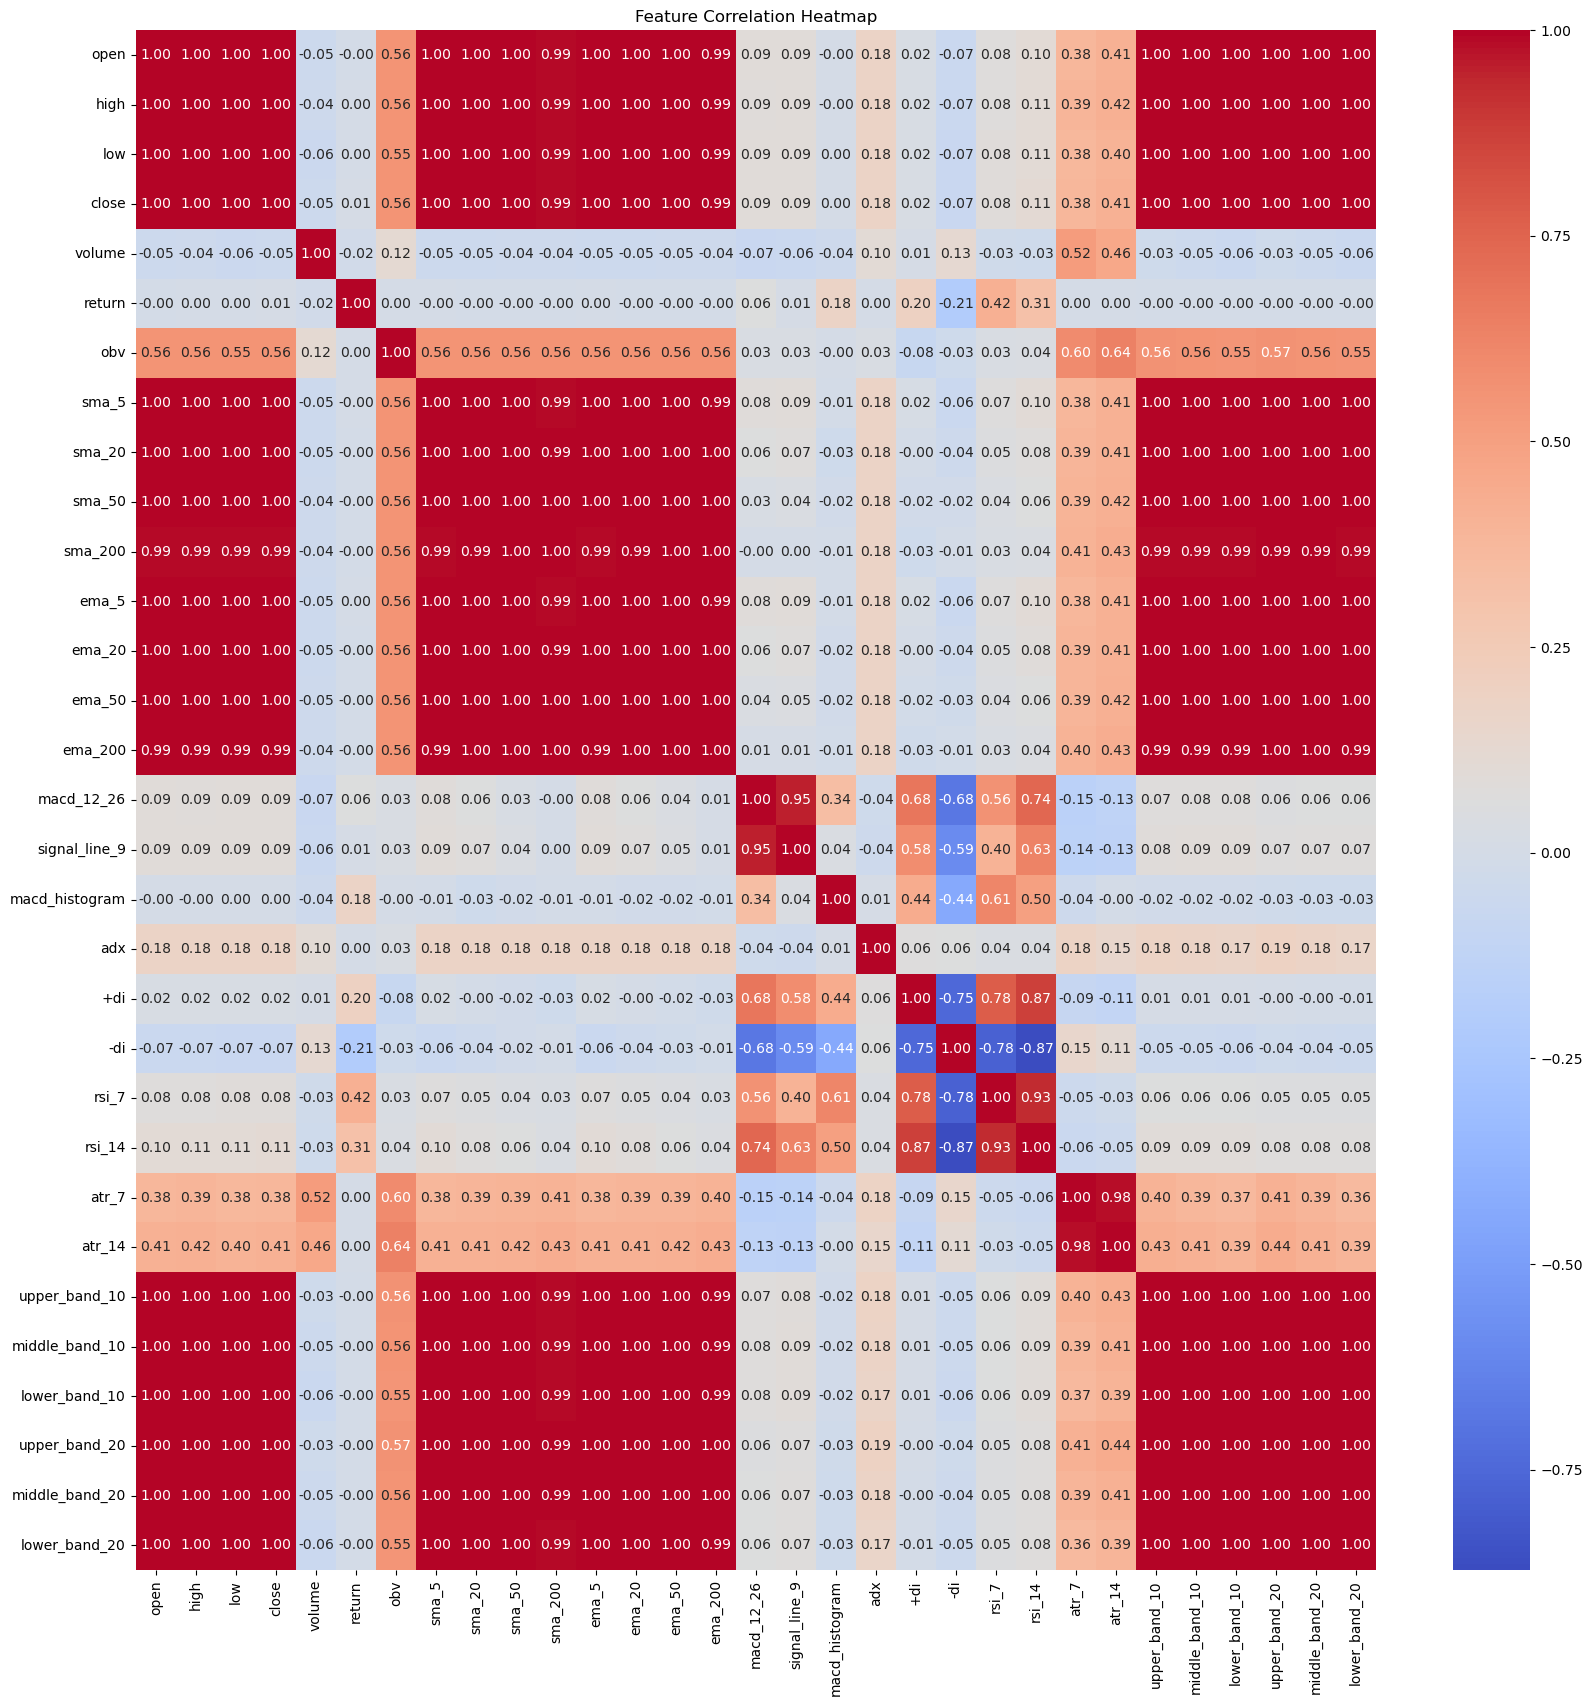

In [18]:
columns = D.drop(['return_forward'], axis=1)
corr_matrix = columns.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## Moving Averages

In [19]:
# Manually drop some Moving Averages

# D = D.drop(['sma_10','sma_100','ema_10','ema_100'], axis=1)

KeyError: "['sma_10', 'sma_100', 'ema_10', 'ema_100'] not found in axis"

In [20]:
# Feature Engineering

def ma_features(df):
    val = [5,20,50,200]
    
    ma_diff = pd.DataFrame()
    
    for i in range(len(val)-1):
        short_ma = val[i]
        long_ma = val[i+1]
        ma_diff[f'sma_{short_ma}_{long_ma}_diff'] = df[f'sma_{short_ma}'] - df[f'sma_{long_ma}']
        
    for i in range(len(val)-1):
        short_ma = val[i]
        long_ma = val[i+1]
        ma_diff[f'ema_{short_ma}_{long_ma}_diff'] = df[f'ema_{short_ma}'] - df[f'ema_{long_ma}']

    for i in ma_diff:
        ma_diff[f'{i}_abs_chg'] = ma_diff[i].diff()
        ma_diff[f'{i}_pct_chg'] = ma_diff[i].pct_change()

    data = pd.concat([df[['sma_5', 'sma_20', 'sma_50', 'sma_200', 'ema_5', 'ema_20','ema_50', 'ema_200']],ma_diff], axis=1)
    return data

ma_features(D)    

,sma_5,sma_20,sma_50,sma_200,ema_5,ema_20,ema_50,ema_200,sma_5_20_diff,sma_20_50_diff,...,sma_20_50_diff_abs_chg,sma_20_50_diff_pct_chg,sma_50_200_diff_abs_chg,sma_50_200_diff_pct_chg,ema_5_20_diff_abs_chg,ema_5_20_diff_pct_chg,ema_20_50_diff_abs_chg,ema_20_50_diff_pct_chg,ema_50_200_diff_abs_chg,ema_50_200_diff_pct_chg
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,28736.930,28854.8905,28299.9662,26067.8624,28789.562134,28727.375011,28307.990348,26396.228665,-117.9605,554.9243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:00:00,28813.352,28858.0050,28352.3742,26094.6905,28925.821423,28772.228819,28342.906021,26424.110370,-44.6530,505.6308,...,-49.2935,-0.088829,25.5799,0.011460,91.405480,1.469846,9.938136,0.023697,7.033968,0.003679
2021-01-01 02:00:00,28932.070,28869.1935,28394.1632,26121.7128,28947.940949,28793.176551,28368.367746,26449.663301,62.8765,475.0303,...,-30.6005,-0.060519,14.7667,0.006541,1.171794,0.007629,-4.513993,-0.010514,-0.091207,-0.000048
2021-01-01 03:00:00,29041.018,28889.6280,28437.3836,26148.6518,29013.480632,28826.641641,28398.806658,26476.478194,151.3900,452.2444,...,-22.7859,-0.047967,16.2814,0.007165,32.074593,0.207248,3.026178,0.007124,3.624019,0.001889
2021-01-01 04:00:00,29055.380,28887.0185,28479.2488,26176.4429,29006.583755,28842.465294,28422.100122,26501.516122,168.3615,407.7697,...,-44.4747,-0.098342,14.0741,0.006149,-22.720531,-0.121605,-7.469811,-0.017460,-1.744464,-0.000907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,94342.200,94002.9000,93690.0400,95406.8050,94208.917308,94116.667231,94001.883659,95488.516399,339.3000,312.8600,...,20.7900,0.071182,13.3750,-0.007731,-89.019998,-0.491090,-11.688302,-0.092418,15.129208,-0.010074
2024-12-31 20:00:00,93968.200,93998.4000,93688.5000,95392.9400,93944.278205,94049.841781,93978.868614,95467.884395,-30.2000,309.9000,...,-2.9600,-0.009461,12.3250,-0.007179,-197.813652,-2.144320,-43.810405,-0.381678,-2.383041,0.001603
2024-12-31 21:00:00,93768.800,94007.2500,93693.5200,95387.5550,93856.852137,94014.809230,93967.226707,95450.114401,-238.4500,313.7300,...,3.8300,0.012359,10.4050,-0.006105,-52.393518,0.496322,-23.390644,-0.329570,6.128088,-0.004116


## MACD

In [ ]:
D[['macd_12_26', 'signal_line_9', 'macd_histogram']].tail()

In [ ]:
def macd_features(df):
    data = df[['macd_12_26', 'signal_line_9', 'macd_histogram']]
    data['macd_position'] = np.where(df['macd_histogram']>0, 1, -1)

    data['macd_crossover'] = np.NaN
    
    for i in range(1, len(data)):
        t = data.iloc[i,:].name
        t_1 = data.iloc[i-1,:].name

        if data.loc[t,'macd_position'] > 0 and data.loc[t_1, 'macd_position'] < 0:    
            data.loc[t,'macd_crossover'] = 1 * data.loc[t,'macd_histogram']
        if data.loc[t,'macd_position'] < 0 and data.loc[t_1, 'macd_position'] > 0:    
            data.loc[t,'macd_crossover'] = -1 * data.loc[t,'macd_histogram']
        elif data.loc[t,'macd_position'] == data.loc[t_1, 'macd_position']:
            data.loc[t, 'macd_crossover'] = 0

    
 
    return data
    
macd_features(D)

## ADX

In [ ]:
D[['adx','+di','-di']].tail()

In [ ]:
def adx_features(df):
    data = df[['adx','+di','-di']]
    data['adx_slope'] = data['adx'].diff(3) / 3
    data['adx_strength'] = np.where(data['adx'] > 25, 1, -1)
    data['di_crossover'] = np.where(data['+di'] > data['-di'], 1, -1)
    data['di_spread'] = data['+di'] - df['-di']
    data['adx_di_composite'] = data['adx'] * data['di_spread']
    
    return data

adx_features(D)    

## RSI

In [ ]:
def rsi_features(df):
    data = df[['rsi_7','rsi_14']]
    data['rsi_7_slope'] = data['rsi_7'].diff(3) / 3
    data['rsi_7_chg'] = data['rsi_7'].pct_change()
    data['rsi_7_acceleration'] = data['rsi_7_slope'].diff(3)
    data['rsi_14_slope'] = data['rsi_14'].diff(3) / 3
    data['rsi_14_chg'] = data['rsi_14'].pct_change()
    data['rsi_14_acceleration'] = data['rsi_14_slope'].diff(3)
    data['rsi_ratio'] = data['rsi_7'] / data['rsi_14']

    
    return data

rsi_features(D)

## ATR

In [ ]:
D = D.drop(['atr_21'], axis=1)

In [ ]:
def atr_features(df):
    data = df[['atr_7', 'atr_14']]

    data['atr_7_slope'] = data['atr_7'].diff(3) / 3
    data['atr_7_chg'] = data['atr_7'].pct_change()
    data['atr_14_slope'] = data['atr_14'].diff(3) / 3
    data['atr_14_chg'] = data['atr_14'].pct_change()
    data['price_change'] = df['close'].diff(1)
    data['norm_price_change_7'] = data['price_change'] / data['atr_7']
    data['norm_price_change_14'] = data['price_change'] / data['atr_14']
    data['atr_ratio'] = data['atr_7']/ data['atr_14']

    data['trailing_stop_long_7'] = df['high'] - 2 * df['atr_7']
    data['trailing_stop_long_14'] = df['high'] - 2 * df['atr_14']
    data['trailing_stop_short_7'] = df['low'] + 2 * df['atr_7']
    data['trailing_stop_short_14'] = df['low'] + 2 * df['atr_14']
    data.drop(['price_change'], axis=1, inplace=True)
    return data

atr_features(D)

## Bollinger Bands

In [ ]:
def bb_features(df):
    data = df[['upper_band_10', 'middle_band_10', 'lower_band_10', 'upper_band_20','middle_band_20', 'lower_band_20']]

    data['10_band_width'] = (df['upper_band_10'] - df['lower_band_10']) / df['middle_band_10']
    data['pct_b_10'] = (df['close'] - df['lower_band_10']) / (df['upper_band_10'] - df['lower_band_10'])
    
    data['20_band_width'] = (df['upper_band_20'] - df['lower_band_20']) / df['middle_band_20']
    data['pct_b_20'] = (df['close'] - df['lower_band_20']) / (df['upper_band_20'] - df['lower_band_20'])
    
    
    return data

bb_features(D)

# Variables & Functions for Feature Engineering & Data Transformation

In [ ]:
# one function in each markdown
# function input : dataset btcusd_hourly_price_indicators.parquet

# each function return a DataFrame for the indicator
# concat all function output to get full Dataset
# Used the dataset train as example

In [24]:
def get_features(df):
    
    def ma_features(df):
        val = [5,20,50,200]
        
        ma_diff = pd.DataFrame()
        
        for i in range(len(val)-1):
            short_ma = val[i]
            long_ma = val[i+1]
            ma_diff[f'sma_{short_ma}_{long_ma}_diff'] = df[f'sma_{short_ma}'] - df[f'sma_{long_ma}']
            
        for i in range(len(val)-1):
            short_ma = val[i]
            long_ma = val[i+1]
            ma_diff[f'ema_{short_ma}_{long_ma}_diff'] = df[f'ema_{short_ma}'] - df[f'ema_{long_ma}']
    
        for i in ma_diff:
            ma_diff[f'{i}_abs_chg'] = ma_diff[i].diff()
            ma_diff[f'{i}_pct_chg'] = ma_diff[i].pct_change()
    
        data = pd.concat([df[['sma_5', 'sma_20', 'sma_50', 'sma_200', 'ema_5', 'ema_20','ema_50', 'ema_200']],ma_diff], axis=1)
        return data


    
    def macd_features(df):
        data = df[['macd_12_26', 'signal_line_9', 'macd_histogram']]
        data['macd_position'] = np.where(df['macd_histogram']>0, 1, -1)
        data['macd_crossover'] = np.NaN
        
        for i in range(1, len(data)):
            t = data.iloc[i,:].name
            t_1 = data.iloc[i-1,:].name
    
            if data.loc[t,'macd_position'] > 0 and data.loc[t_1, 'macd_position'] < 0:    
                data.loc[t,'macd_crossover'] = 1 * data.loc[t,'macd_histogram']
            if data.loc[t,'macd_position'] < 0 and data.loc[t_1, 'macd_position'] > 0:    
                data.loc[t,'macd_crossover'] = -1 * data.loc[t,'macd_histogram']
            elif data.loc[t,'macd_position'] == data.loc[t_1, 'macd_position']:
                data.loc[t, 'macd_crossover'] = 0
        return data


    def adx_features(df):
        data = df[['adx','+di','-di']]
        data['adx_slope'] = data['adx'].diff(3) / 3
        data['adx_strength'] = np.where(data['adx'] > 25, 1, -1)
        data['di_crossover'] = np.where(data['+di'] > data['-di'], 1, -1)
        data['di_spread'] = data['+di'] - df['-di']
        data['adx_di_composite'] = data['adx'] * data['di_spread']
        return data



    def rsi_features(df):
        data = df[['rsi_7','rsi_14']]
        data['rsi_7_slope'] = data['rsi_7'].diff(3) / 3
        data['rsi_7_chg'] = data['rsi_7'].pct_change()
        data['rsi_7_acceleration'] = data['rsi_7_slope'].diff(3)
        data['rsi_14_slope'] = data['rsi_14'].diff(3) / 3
        data['rsi_14_chg'] = data['rsi_14'].pct_change()
        data['rsi_14_acceleration'] = data['rsi_14_slope'].diff(3)
        data['rsi_ratio'] = data['rsi_7'] / data['rsi_14']    
        return data


    def atr_features(df):
        data = df[['atr_7', 'atr_14']]
    
        data['atr_7_slope'] = data['atr_7'].diff(3) / 3
        data['atr_7_chg'] = data['atr_7'].pct_change()
        data['atr_14_slope'] = data['atr_14'].diff(3) / 3
        data['atr_14_chg'] = data['atr_14'].pct_change()
        data['price_change'] = df['close'].diff(1)
        data['norm_price_change_7'] = data['price_change'] / data['atr_7']
        data['norm_price_change_14'] = data['price_change'] / data['atr_14']
        data['atr_ratio'] = data['atr_7']/ data['atr_14']
    
        data['trailing_stop_long_7'] = df['high'] - 2 * df['atr_7']
        data['trailing_stop_long_14'] = df['high'] - 2 * df['atr_14']
        data['trailing_stop_short_7'] = df['low'] + 2 * df['atr_7']
        data['trailing_stop_short_14'] = df['low'] + 2 * df['atr_14']
        data.drop(['price_change'], axis=1, inplace=True)
        return data



    def bb_features(df):
        data = df[['upper_band_10', 'middle_band_10', 'lower_band_10', 'upper_band_20','middle_band_20', 'lower_band_20']]
    
        data['10_band_width'] = (df['upper_band_10'] - df['lower_band_10']) / df['middle_band_10']
        data['pct_b_10'] = (df['close'] - df['lower_band_10']) / (df['upper_band_10'] - df['lower_band_10'])
        
        data['20_band_width'] = (df['upper_band_20'] - df['lower_band_20']) / df['middle_band_20']
        data['pct_b_20'] = (df['close'] - df['lower_band_20']) / (df['upper_band_20'] - df['lower_band_20'])
        return data



    
    ma_features = ma_features(df)
    macd_features = macd_features(df)
    adx_features = adx_features(df)
    rsi_features = rsi_features(df)
    atr_features = atr_features(df)
    bb_features = bb_features(df)

    full_data = pd.concat([df['return_forward'], df['open'],df['high'],df['low'],df['close'],df['volume'],df['return'],
                           ma_features,macd_features,adx_features,rsi_features,atr_features,bb_features],axis=1)
    
    return full_data

df = get_features(D)
df

C:\Users\User\AppData\Local\Temp\ipykernel_28852\2603391963.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['macd_position'] = np.where(df['macd_histogram']>0, 1, -1)
C:\Users\User\AppData\Local\Temp\ipykernel_28852\2603391963.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['macd_crossover'] = np.NaN
C:\Users\User\AppData\Local\Temp\ipykernel_28852\2603391963.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,return_forward,open,high,low,close,volume,return,sma_5,sma_20,sma_50,...,upper_band_10,middle_band_10,lower_band_10,upper_band_20,middle_band_20,lower_band_20,10_band_width,pct_b_10,20_band_width,pct_b_20
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0.008612,28912.47,29052.03,28776.17,28949.03,365.064315,0.000970,28736.930,28854.8905,28299.9662,...,29223.387286,28741.153,28258.918714,29307.198761,28854.8905,28402.582239,0.033557,0.715535,0.031351,0.604066
2021-01-01 01:00:00,-0.007061,28949.71,29200.00,28921.64,29198.34,520.772208,0.008612,28813.352,28858.0050,28352.3742,...,29240.874492,28744.982,28249.089508,29318.792740,28858.0050,28397.217260,0.034503,0.957113,0.031935,0.869297
2021-01-01 02:00:00,0.005256,29200.00,29219.01,28947.70,28992.18,394.441884,-0.007061,28932.070,28869.1935,28394.1632,...,29256.754515,28750.826,28244.897485,29331.599971,28869.1935,28406.787029,0.035194,0.738526,0.032035,0.632985
2021-01-01 03:00:00,-0.005207,28987.60,29191.60,28945.26,29144.56,220.722444,0.005256,29041.018,28889.6280,28437.3836,...,29351.781840,28798.405,28245.028160,29362.660536,28889.6280,28416.595464,0.038431,0.812766,0.032748,0.769466
2021-01-01 04:00:00,0.002213,29135.25,29161.46,28843.74,28992.79,500.353472,-0.005207,29055.380,28887.0185,28479.2488,...,29380.790455,28842.084,28303.377545,29357.161215,28887.0185,28416.875785,0.037356,0.639878,0.032550,0.612489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,-0.006308,93760.00,94158.00,93600.00,94008.00,7.863550,0.002666,94342.200,94002.9000,93690.0400,...,95801.067876,94516.700,93232.332124,95433.425204,94002.9000,92572.374796,0.027178,0.301965,0.030436,0.501783
2024-12-31 20:00:00,0.002858,94025.00,94059.00,93300.00,93415.00,4.565475,-0.006308,93968.200,93998.4000,93688.5000,...,95876.395307,94461.600,93046.804693,95435.711991,93998.4000,92561.088009,0.029955,0.130123,0.030582,0.297052
2024-12-31 21:00:00,-0.004142,93386.00,93777.00,93336.00,93682.00,28.484950,0.002858,93768.800,94007.2500,93693.5200,...,95898.271810,94421.000,92943.728190,95434.444994,94007.2500,92580.055006,0.031291,0.249877,0.030364,0.386053


# Export

In [23]:
# D.columns

Index(['open', 'high', 'low', 'close', 'volume', 'return_forward', 'return',
       'obv', 'sma_5', 'sma_20', 'sma_50', 'sma_200', 'ema_5', 'ema_20',
       'ema_50', 'ema_200', 'macd_12_26', 'signal_line_9', 'macd_histogram',
       'adx', '+di', '-di', 'rsi_7', 'rsi_14', 'atr_7', 'atr_14',
       'upper_band_10', 'middle_band_10', 'lower_band_10', 'upper_band_20',
       'middle_band_20', 'lower_band_20'],
      dtype='object')

In [25]:
df = df['2021-01-01':]
df.columns

Index(['return_forward', 'open', 'high', 'low', 'close', 'volume', 'return',
       'sma_5', 'sma_20', 'sma_50', 'sma_200', 'ema_5', 'ema_20', 'ema_50',
       'ema_200', 'sma_5_20_diff', 'sma_20_50_diff', 'sma_50_200_diff',
       'ema_5_20_diff', 'ema_20_50_diff', 'ema_50_200_diff',
       'sma_5_20_diff_abs_chg', 'sma_5_20_diff_pct_chg',
       'sma_20_50_diff_abs_chg', 'sma_20_50_diff_pct_chg',
       'sma_50_200_diff_abs_chg', 'sma_50_200_diff_pct_chg',
       'ema_5_20_diff_abs_chg', 'ema_5_20_diff_pct_chg',
       'ema_20_50_diff_abs_chg', 'ema_20_50_diff_pct_chg',
       'ema_50_200_diff_abs_chg', 'ema_50_200_diff_pct_chg', 'macd_12_26',
       'signal_line_9', 'macd_histogram', 'macd_position', 'macd_crossover',
       'adx', '+di', '-di', 'adx_slope', 'adx_strength', 'di_crossover',
       'di_spread', 'adx_di_composite', 'rsi_7', 'rsi_14', 'rsi_7_slope',
       'rsi_7_chg', 'rsi_7_acceleration', 'rsi_14_slope', 'rsi_14_chg',
       'rsi_14_acceleration', 'rsi_ratio', 'atr_7'

In [26]:
df.to_parquet('btcusd_hourly_features.parquet')

In [27]:
new = pd.read_parquet('btcusd_hourly_features.parquet', engine='pyarrow')
new

,return_forward,open,high,low,close,volume,return,sma_5,sma_20,sma_50,...,upper_band_10,middle_band_10,lower_band_10,upper_band_20,middle_band_20,lower_band_20,10_band_width,pct_b_10,20_band_width,pct_b_20
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0.008612,28912.47,29052.03,28776.17,28949.03,365.064315,0.000970,28736.930,28854.8905,28299.9662,...,29223.387286,28741.153,28258.918714,29307.198761,28854.8905,28402.582239,0.033557,0.715535,0.031351,0.604066
2021-01-01 01:00:00,-0.007061,28949.71,29200.00,28921.64,29198.34,520.772208,0.008612,28813.352,28858.0050,28352.3742,...,29240.874492,28744.982,28249.089508,29318.792740,28858.0050,28397.217260,0.034503,0.957113,0.031935,0.869297
2021-01-01 02:00:00,0.005256,29200.00,29219.01,28947.70,28992.18,394.441884,-0.007061,28932.070,28869.1935,28394.1632,...,29256.754515,28750.826,28244.897485,29331.599971,28869.1935,28406.787029,0.035194,0.738526,0.032035,0.632985
2021-01-01 03:00:00,-0.005207,28987.60,29191.60,28945.26,29144.56,220.722444,0.005256,29041.018,28889.6280,28437.3836,...,29351.781840,28798.405,28245.028160,29362.660536,28889.6280,28416.595464,0.038431,0.812766,0.032748,0.769466
2021-01-01 04:00:00,0.002213,29135.25,29161.46,28843.74,28992.79,500.353472,-0.005207,29055.380,28887.0185,28479.2488,...,29380.790455,28842.084,28303.377545,29357.161215,28887.0185,28416.875785,0.037356,0.639878,0.032550,0.612489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,-0.006308,93760.00,94158.00,93600.00,94008.00,7.863550,0.002666,94342.200,94002.9000,93690.0400,...,95801.067876,94516.700,93232.332124,95433.425204,94002.9000,92572.374796,0.027178,0.301965,0.030436,0.501783
2024-12-31 20:00:00,0.002858,94025.00,94059.00,93300.00,93415.00,4.565475,-0.006308,93968.200,93998.4000,93688.5000,...,95876.395307,94461.600,93046.804693,95435.711991,93998.4000,92561.088009,0.029955,0.130123,0.030582,0.297052
2024-12-31 21:00:00,-0.004142,93386.00,93777.00,93336.00,93682.00,28.484950,0.002858,93768.800,94007.2500,93693.5200,...,95898.271810,94421.000,92943.728190,95434.444994,94007.2500,92580.055006,0.031291,0.249877,0.030364,0.386053
